# Trying New Data

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re



### Reading df

### Clean Data  

In [145]:
def change_col_name(df, col:int):
    cell_name = col - ((col-2) % 4)
    df.iloc[1,col] = df.iloc[0,cell_name] + '_' + df.iloc[1,col]
    return cell_name

In [146]:
GENE_AXIS = 0
SAMPLE_AXIS = 1


# Reading the data
raw_df = pd.read_csv('ASE-HYBRID.csv', header=None, skiprows=[1,2] )

# Removing first 16 columns
raw_df = raw_df.iloc[:,16:-1]


samples = raw_df.iloc[0].dropna().values

# Renaming the columns
for i in range(2,raw_df.shape[1]):
    change_col_name(raw_df, i)
raw_df.columns = raw_df.iloc[1,:]

# Removing the first two rows
raw_df = raw_df.drop([0,1])
ambig_cols = [col for col in raw_df.columns if 'ambig' in col] + [col for col in raw_df.columns if 'no_ase' in col]
raw_df = raw_df.drop(columns=ambig_cols+['chrom'])
raw_df.index = raw_df['gene']
raw_df = raw_df.drop(columns=['gene'])
raw_df

C:\Users\wmata\AppData\Local\Temp\ipykernel_21628\3258875006.py:6: DtypeWarning: Columns (0,1,8,9,10,11,12,13,14,15,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv('ASE-HYBRID.csv', header=None, skiprows=[1,2] )


1,HL1-25_1_ref_counts,HL1-25_1_alt_counts,HL1-25_2_ref_counts,HL1-25_2_alt_counts,HL1-29_1_ref_counts,HL1-29_1_alt_counts,HL1-29_2_ref_counts,HL1-29_2_alt_counts,HL1-30_1_ref_counts,HL1-30_1_alt_counts,...,CNCC_H20961_2_ref_counts,CNCC_H20961_2_alt_counts,CNCC_H20961_3_ref_counts,CNCC_H20961_3_alt_counts,CNCC_C3649_1_ref_counts,CNCC_C3649_1_alt_counts,CNCC_C3649_2_ref_counts,CNCC_C3649_2_alt_counts,CNCC_C3649_3_ref_counts,CNCC_C3649_3_alt_counts
gene,,,,,,,,,,,,,,,,,,,,,
3.8-1.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.8-1.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.8-1.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5-HT3C2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1BG,39,70,65,92,50,79,58,65,85,136,...,141,0,213,0,0,111,0,177,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,450,753,535,980,418,713,462,770,389,713,...,1820,2,1187,0,0,338,0,691,1,1215
ZYX,3917,4570,6926,8019,3901,4161,5462,6134,5868,6588,...,11495,5,5060,5,4,1254,6,2344,4,250
ZZEF1,552,423,703,549,456,403,681,537,639,501,...,4104,2,1375,4,2,638,2,1066,2,941


In [147]:
raw_df = raw_df.apply(pd.to_numeric, errors='coerce')
raw_df

1,HL1-25_1_ref_counts,HL1-25_1_alt_counts,HL1-25_2_ref_counts,HL1-25_2_alt_counts,HL1-29_1_ref_counts,HL1-29_1_alt_counts,HL1-29_2_ref_counts,HL1-29_2_alt_counts,HL1-30_1_ref_counts,HL1-30_1_alt_counts,...,CNCC_H20961_2_ref_counts,CNCC_H20961_2_alt_counts,CNCC_H20961_3_ref_counts,CNCC_H20961_3_alt_counts,CNCC_C3649_1_ref_counts,CNCC_C3649_1_alt_counts,CNCC_C3649_2_ref_counts,CNCC_C3649_2_alt_counts,CNCC_C3649_3_ref_counts,CNCC_C3649_3_alt_counts
gene,,,,,,,,,,,,,,,,,,,,,
3.8-1.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.8-1.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.8-1.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5-HT3C2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1BG,39,70,65,92,50,79,58,65,85,136,...,141,0,213,0,0,111,0,177,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,450,753,535,980,418,713,462,770,389,713,...,1820,2,1187,0,0,338,0,691,1,1215
ZYX,3917,4570,6926,8019,3901,4161,5462,6134,5868,6588,...,11495,5,5060,5,4,1254,6,2344,4,250
ZZEF1,552,423,703,549,456,403,681,537,639,501,...,4104,2,1375,4,2,638,2,1066,2,941


In [148]:
print("Shape before filtering:", raw_df.shape)
df = raw_df[raw_df.gt(50).any(axis=1)]
print("Shape after filtering:", df.shape)
df


Shape before filtering: (45948, 62)
Shape after filtering: (16262, 62)


1,HL1-25_1_ref_counts,HL1-25_1_alt_counts,HL1-25_2_ref_counts,HL1-25_2_alt_counts,HL1-29_1_ref_counts,HL1-29_1_alt_counts,HL1-29_2_ref_counts,HL1-29_2_alt_counts,HL1-30_1_ref_counts,HL1-30_1_alt_counts,...,CNCC_H20961_2_ref_counts,CNCC_H20961_2_alt_counts,CNCC_H20961_3_ref_counts,CNCC_H20961_3_alt_counts,CNCC_C3649_1_ref_counts,CNCC_C3649_1_alt_counts,CNCC_C3649_2_ref_counts,CNCC_C3649_2_alt_counts,CNCC_C3649_3_ref_counts,CNCC_C3649_3_alt_counts
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,39,70,65,92,50,79,58,65,85,136,...,141,0,213,0,0,111,0,177,0,1
A1BG-AS1,40,49,68,66,46,49,33,35,73,60,...,217,0,87,0,0,38,0,53,0,59
A2M,1,13,21,40,3,11,4,11,2,7,...,9172,1,3912,1,6,143,6,243,5,5
A2ML1,129,50,101,33,178,37,106,58,125,58,...,3,0,0,0,0,0,0,0,0,1
A4GALT,154,79,85,51,140,94,73,52,173,94,...,1,0,7,0,0,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,20,51,28,87,27,69,26,64,16,29,...,51,1,5,0,0,8,0,17,0,84
ZYG11B,450,753,535,980,418,713,462,770,389,713,...,1820,2,1187,0,0,338,0,691,1,1215
ZYX,3917,4570,6926,8019,3901,4161,5462,6134,5868,6588,...,11495,5,5060,5,4,1254,6,2344,4,250


### Parse the sample types

In [149]:
HYBRIDS_SAMPLES = set([s for s in df.columns if 'HL' in s])
non_hybrid = set(df.columns) - HYBRIDS_SAMPLES
HUMAN_SAMPLES = set([s for s in non_hybrid if 'H' in s])
CHIMP_SAMPLES = non_hybrid - HUMAN_SAMPLES
REF_COUNT = set([s for s in df.columns if 'ref' in s])
ALT_COUNT = set([s for s in df.columns if 'alt' in s])
NO_ASE_COUNT = set([s for s in df.columns if 'no_ase' in s])
CNCC = set([s for s in df.columns if 'CNCC' in s])
IPSC = set(df.columns) - CNCC


def intersect(list_of_categories):
    return list(set.intersection(*list_of_categories))

# print('IPSC & Human & ref:', len(get_samples([IPSC, HUMAN_SAMPLES, REF_COUNT ])), get_samples([IPSC, HUMAN_SAMPLES, REF_COUNT ]))
# print('IPSC & Hybrid & ref:', len(get_samples([IPSC, HYBRIDS_SAMPLES, REF_COUNT ])), get_samples([IPSC, HYBRIDS_SAMPLES, REF_COUNT ]))
# print('HUMAN', len(HUMAN_SAMPLES), HUMAN_SAMPLES)
# intersect([CNCC, CHIMP_SAMPLES, REF_COUNT ])




### Compare Hybrid Expression to Parental Expression
This is to filter out genes that get too messy with the the tetraploidism

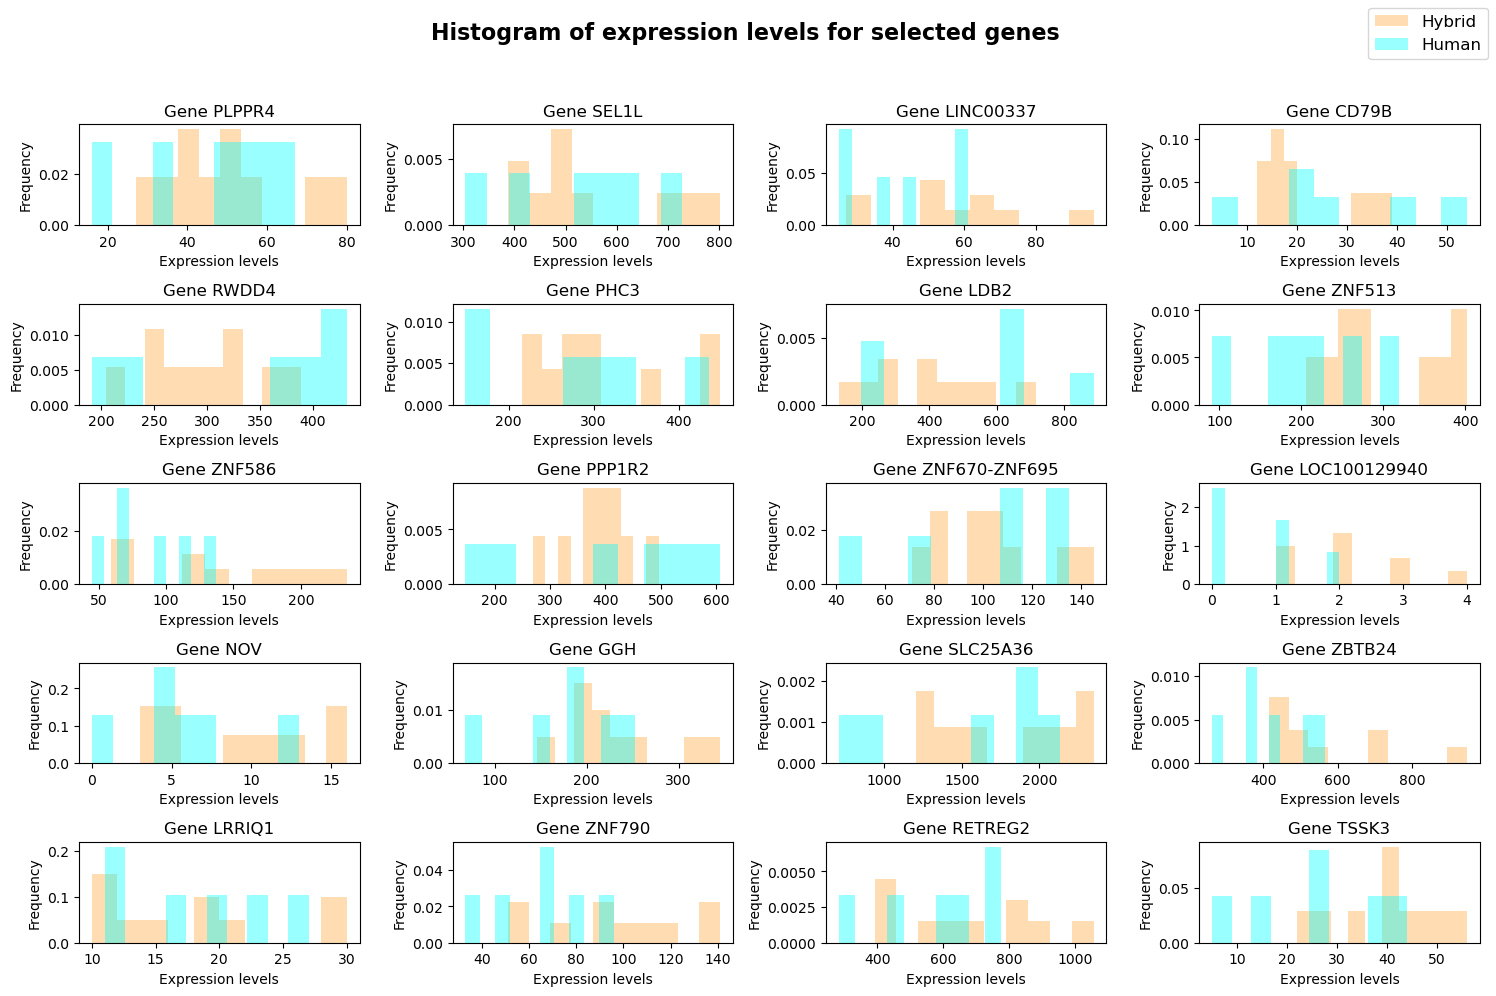

In [150]:
np.random.seed(0)
SAMPLE_AMOUNT = 20
selected_genes = df.sample(SAMPLE_AMOUNT, axis=GENE_AXIS).index

hybrid_h = 'darkorange'
parental_h = 'cyan'


fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 10))
fig.suptitle('Histogram of expression levels for selected genes', fontsize=16, fontweight='bold')
axes = axes.flatten()
for i, gene in enumerate(selected_genes):
    ax = axes[i]
    df_hybrid_h_ipsc = df.loc[gene, intersect([IPSC, HYBRIDS_SAMPLES, REF_COUNT])]
    df_human_h_ipsc = df.loc[gene, intersect([IPSC, HUMAN_SAMPLES, REF_COUNT])]

    ax.hist(df_hybrid_h_ipsc, bins=10, alpha=0.3, label='Hybrid', color=hybrid_h, density=True)
    ax.hist(df_human_h_ipsc, bins=10, alpha=0.4, label='Human', color=parental_h, density=True)
    ax.set_xlabel('Expression levels')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Gene {gene}')
    # ax.legend(loc='upper right')
fig.legend(["Hybrid", "Human"], loc='upper right', fontsize='12', frameon=True, )
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu


def get_p_values(gene):
    human_h_values = df.loc[gene, intersect([HUMAN_SAMPLES, REF_COUNT, IPSC])]
    hybrid_h_vlaues = df.loc[gene, intersect([HYBRIDS_SAMPLES, REF_COUNT, IPSC])]
    
    # t_stat_ttest, p_value_two_tailed_ttest = ttest_ind(disease_values, healthy_values, equal_var=False)
    _, p_val_ttest = ttest_ind(human_h_values, hybrid_h_vlaues, equal_var=False, alternative='two-sided')
    _, p_val_wilcoxon = mannwhitneyu(human_h_values, hybrid_h_vlaues, alternative='two-sided')
    
    return{ "p_val_ttest": p_val_ttest,
            'p_val_wilcoxon': p_val_wilcoxon
            }


p_values = pd.DataFrame(index=df.index, columns=['p_val_ttest', 'p_val_wilcoxon'])
for gene in df.index: 
    p_values.loc[gene] = get_p_values(gene)

p_values.head()
